# Generating Results on Datasets

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

sys.path.append('../..')
from pytracking.analysis.plot_results import plot_results, print_results, print_per_sequence_results
from pytracking.evaluation import Tracker, get_dataset, trackerlist

/mnt/working/miniconda/envs/pytracking/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Plots for OTB, NFS and UAV

In [ ]:
trackers = []
trackers.extend(trackerlist('atom', 'default', range(0,5), 'ATOM'))
trackers.extend(trackerlist('dimp', 'dimp18', range(0,5), 'DiMP18'))
trackers.extend(trackerlist('dimp', 'dimp50', range(0,5), 'DiMP50'))
trackers.extend(trackerlist('dimp', 'prdimp18', range(0,5), 'PrDiMP18'))
trackers.extend(trackerlist('dimp', 'prdimp50', range(0,5), 'PrDiMP50'))

dataset = get_dataset('otb')
plot_results(trackers, dataset, 'OTB', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)

dataset = get_dataset('nfs')
plot_results(trackers, dataset, 'NFS', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)

dataset = get_dataset('uav')
plot_results(trackers, dataset, 'UAV', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)

dataset = get_dataset('otb', 'nfs', 'uav')
plot_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)

100%|██████████| 123/123 [00:00<00:00, 123.29it/s]




Computed results over 123 / 123 sequences

Plotting results over 123 / 123 sequences

Generating plots for: UAV


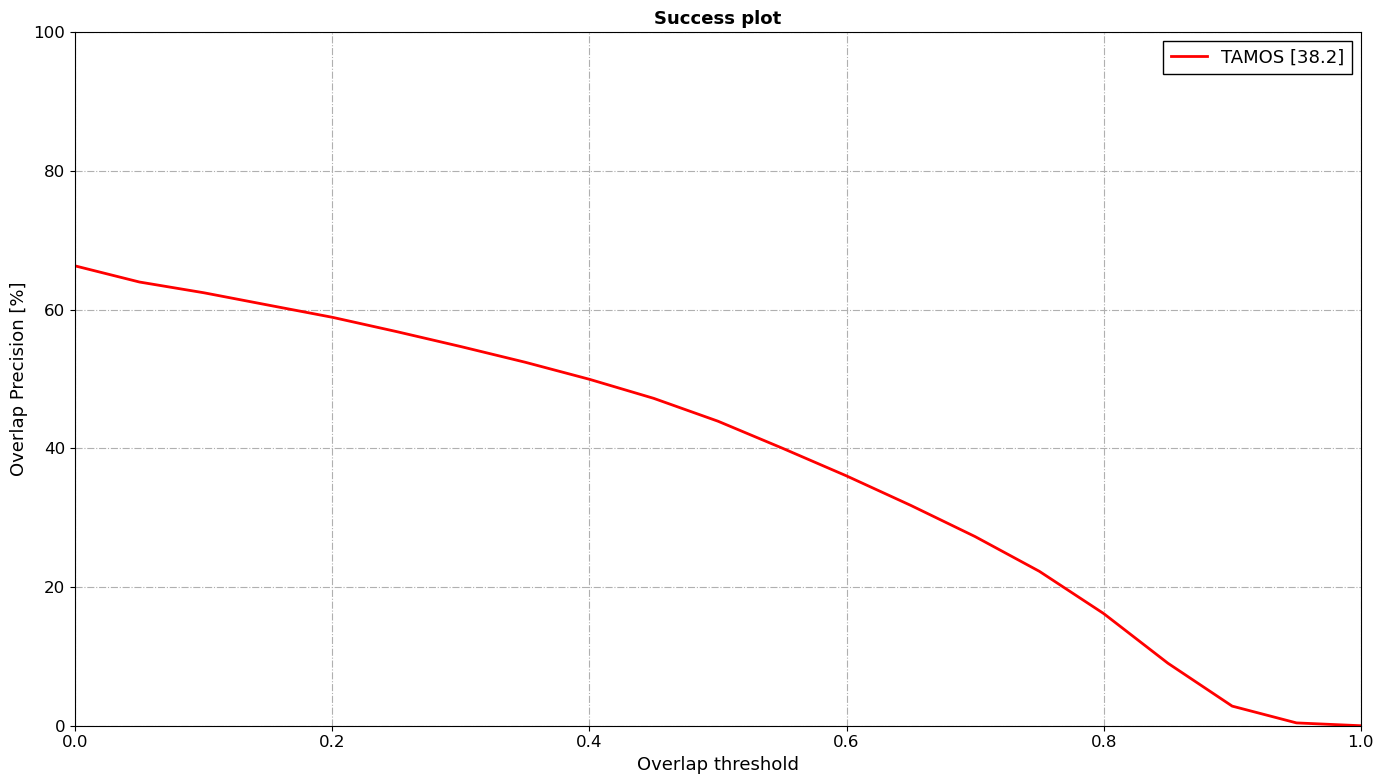

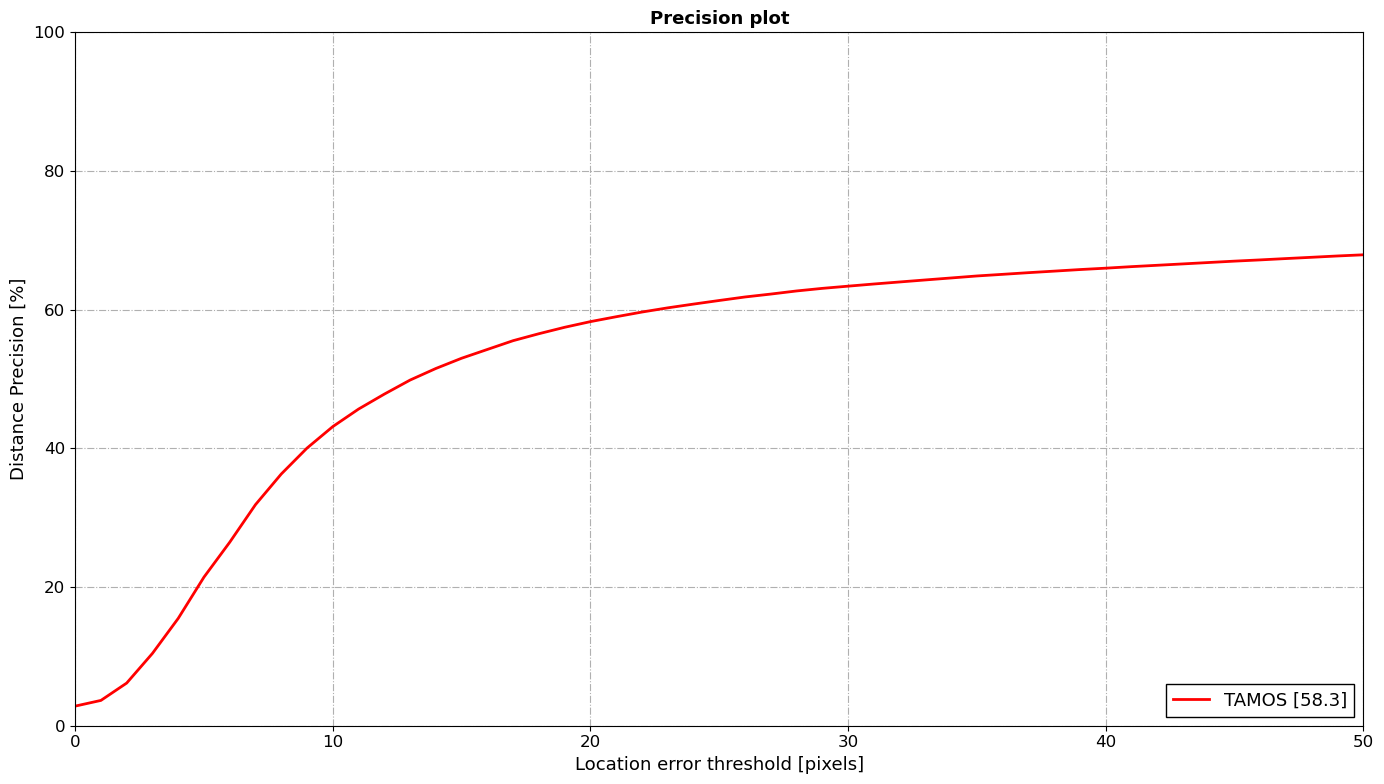

In [4]:
trackers = []
trackers.extend(trackerlist('tamos', 'tamos_swin_base', range(1), 'TAMOS'))
dataset = get_dataset('uav')
plot_results(trackers, dataset, 'UAV', merge_results=True, plot_types=('success', 'prec'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05, exclude_invalid_frames=False)

## Plots for LaSOT

In [ ]:
trackers = []
trackers.extend(trackerlist('atom', 'default', range(0,5), 'ATOM'))
trackers.extend(trackerlist('dimp', 'dimp18', range(0,5), 'DiMP18'))
trackers.extend(trackerlist('dimp', 'dimp50', range(0,5), 'DiMP50'))
trackers.extend(trackerlist('dimp', 'prdimp18', range(0,5), 'PrDiMP18'))
trackers.extend(trackerlist('dimp', 'prdimp50', range(0,5), 'PrDiMP50'))

dataset = get_dataset('lasot')
plot_results(trackers, dataset, 'LaSOT', merge_results=True, plot_types=('success'), 
             skip_missing_seq=False, force_evaluation=True, plot_bin_gap=0.05)

## Tables for OTB, NFS, UAV and LaSOT

In [ ]:
trackers = []
trackers.extend(trackerlist('atom', 'default', range(0,5), 'ATOM'))
trackers.extend(trackerlist('dimp', 'dimp18', range(0,5), 'DiMP18'))
trackers.extend(trackerlist('dimp', 'dimp50', range(0,5), 'DiMP50'))
trackers.extend(trackerlist('dimp', 'prdimp18', range(0,5), 'PrDiMP18'))
trackers.extend(trackerlist('dimp', 'prdimp50', range(0,5), 'PrDiMP50'))

dataset = get_dataset('otb')
print_results(trackers, dataset, 'OTB', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('nfs')
print_results(trackers, dataset, 'NFS', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('uav')
print_results(trackers, dataset, 'UAV', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('otb', 'nfs', 'uav')
print_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

dataset = get_dataset('lasot')
print_results(trackers, dataset, 'LaSOT', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

In [3]:
trackers = []
trackers.extend(trackerlist('tamos', 'tamos_swin_base', range(1), 'TAMOS'))

dataset = get_dataset('uav')
print_results(trackers, dataset, 'UAV', merge_results=True, plot_types=('success', 'prec', 'norm_prec'))

100%|██████████| 123/123 [00:01<00:00, 93.65it/s] 



Computed results over 123 / 123 sequences

Reporting results over 123 / 123 sequences

UAV        | AUC        | OP50       | OP75       | Precision    | Norm Precision    |
TAMOS      | 38.25      | 43.92      | 22.27      | 58.28        | 44.78             |



## Filtered per-sequence results

In [ ]:
# Print per sequence results for sequences where all trackers fail, i.e. all trackers have average overlap in percentage of less than 10.0
filter_criteria = {'mode': 'ao_max', 'threshold': 10.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for sequences where at least one tracker fails, i.e. a tracker has average overlap in percentage of less than 10.0
filter_criteria = {'mode': 'ao_min', 'threshold': 10.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for sequences where the trackers have differing behavior.
# i.e. average overlap in percentage for different trackers on a sequence differ by at least 40.0
filter_criteria = {'mode': 'delta_ao', 'threshold': 40.0}
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)

In [ ]:
# Print per sequence results for all sequences
filter_criteria = None
dataset = get_dataset('otb', 'nfs', 'uav')
print_per_sequence_results(trackers, dataset, 'OTB+NFS+UAV', merge_results=True, filter_criteria=filter_criteria, force_evaluation=False)